# Correlation between Moisture Content and Bulk Density

In [1]:
#Import libraries
import pandas as pd

#Data visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

## Load the dataset

In [58]:
#url dataset
URL = "../Datasets/processed/Soybeans.csv"

#read in excel format
df = pd.read_csv(URL)

print("From USDA: ", URL)

df.head()

From USDA:  ../Datasets/processed/Soybeans.csv


,Unnamed: 0,Variety,Freq,d(cm),M%,Density,Attn,Phase,Phase_Corr,Permittivity_real,Permittivity_imaginary
0,0,GA COOK,9.0,7.7,10.17,0.7016,9.0939,-117.925,-477.925,2.474,0.227
1,1,GA COOK,10.0,7.7,10.17,0.7016,10.4287,-172.315,-532.315,2.479,0.234
2,2,GA COOK,11.0,7.7,10.17,0.7016,11.3727,137.970,-582.030,2.468,0.232
3,3,GA COOK,12.0,7.7,10.17,0.7016,12.1813,83.069,-636.931,2.474,0.228
4,4,GA COOK,13.0,7.7,10.17,0.7016,13.0729,30.688,-689.312,2.472,0.226


In [59]:
# Convert to numpy array
df_features = df[['Freq', 
                    'd(cm)', 
                    'Attn', 
                    'Phase', 
                    'Phase_Corr', 
                    'Permittivity_real', 
                    'Permittivity_imaginary']]

mc = np.array(df['M%'])
bd = np.array(df['Density'])

In [60]:
from sklearn import preprocessing

# Standardize the variables
mc_norm = np.array(preprocessing.normalize([mc])).reshape(-1,1).ravel()
bd_norm = np.array(preprocessing.normalize([bd])).reshape(-1,1).ravel()

# Convert the standardized arrays to Pandas Series (optional but convenient for visualization)
mc_series = pd.Series(mc_norm)
bd_series = pd.Series(bd_norm)
dict_data = {'Moisture Content': mc_series, 'Bulk Density': bd_series}
df_std_data = pd.DataFrame(dict_data, index=None)

# mc_series = pd.Series(mc)
# bd_series = pd.Series(bd)

## View standardized data

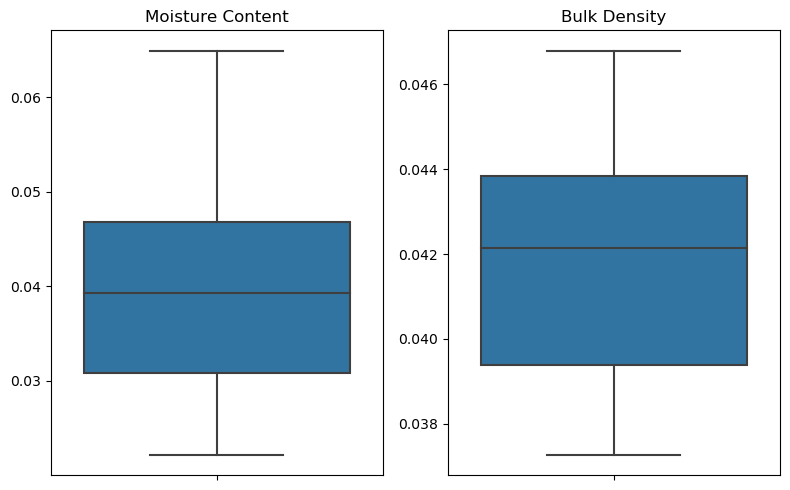

In [61]:
# Check the distribution of each variable
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize=(8,5),)
label = ["Moisture Content", "Bulk Density"]
i = 0

for axi in axs:
    sn.boxplot(y = df_std_data[label[i]].values, ax = axi)
    axi.set_title(label[i])
    i+=1
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient

In [62]:
from sklearn.metrics import r2_score

r2_score = r2_score(mc_norm, bd_norm)
# Print the correlation coefficient
print("R^2 score after Normalization:", r2_score)

R^2 score after Normalization: -0.15778403092487925


## Plot to visualize correlation

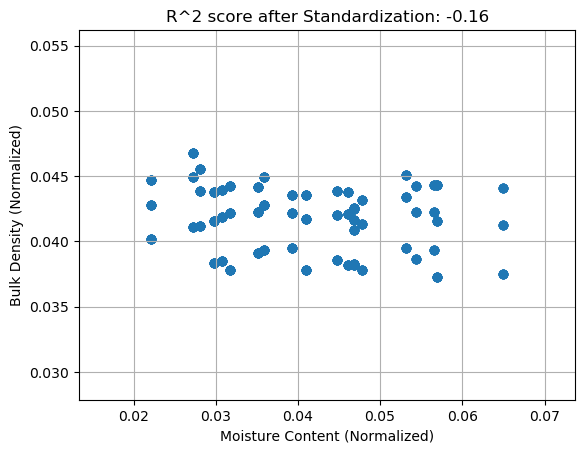

In [63]:
plt.scatter(mc_series, bd_series)
plt.ylabel('Bulk Density (Normalized)')
plt.xlabel('Moisture Content (Normalized)')
plt.title(f"R^2 score after Standardization: {r2_score:.2f}")
plt.grid(True)
plt.show()